## 和の計算の役割

### 三角形の面積

In [1]:
# NumPy を名前np でインポート
import numpy as np

# np.linspace を使用してサイズ5 の配列を作成
# np.sum を使用して配列の和を計算
sum_upper = np.sum(np.linspace(0.2, 1, 5)) / 5
sum_lower = np.sum(np.linspace(0, 0.8, 5)) / 5

# sum_upper とsum_lower を確認
sum_upper, sum_lower

(0.6, 0.4)

In [2]:
# 関数f(x) = x の作成
def f(x):
    return x

In [3]:
def sum_N(N):
    # k_N は1 からN の配列
    k_N = np.arange(1, N + 1)
    # np.sum を使用して和を計算
    return [np.sum(f(k_N/N)/N), np.sum(f((k_N-1)/N)/N)]

In [4]:
sum_N(100)

[0.505, 0.495]

In [5]:
sum_N(10000)

[0.5000500000000001, 0.49995]

### 定積分

In [6]:
# 積分計算するためにintegrate をインポート
from sympy import integrate, symbols, init_printing

init_printing(use_latex="mathjax")

x = symbols('x')

# integrate を使用して定積分を計算
integrate(x, (x, 0, 1))

1/2

## 微分の逆演算としての役割

### 微分の逆演算

### 日本の人口データを使った説明

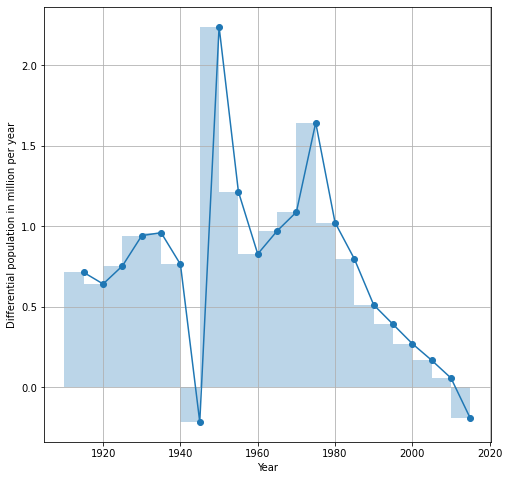

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# 人口変化のデータの取り込み
[year, diff_rate_jp_pop] = np.load('../data/diff_rate_jp_pop.npy')

# グラフの作成
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(year, diff_rate_jp_pop, marker='o')

# 人口変化× 5 年の長方形をグラフに描画
ax.bar(year-5, diff_rate_jp_pop,
width=5, align='edge', alpha=0.3)

# 軸のラベルの設定
ax.set_xlabel('Year')
ax.set_ylabel('Differential population in million per year')

# グリッドの表示
ax.grid()

# グラフの表示
plt.show()

In [8]:
# 1980 年から1985 年の5 年間での人口の増減数
diff_rate_jp_pop[15] * 5

2.5619999999999976

In [9]:
# 1910 年の人口49.184 百万人
pop_start = 49.184
# 1915 年の人口の計算
pop_start + diff_rate_jp_pop[0] * 5

52.752

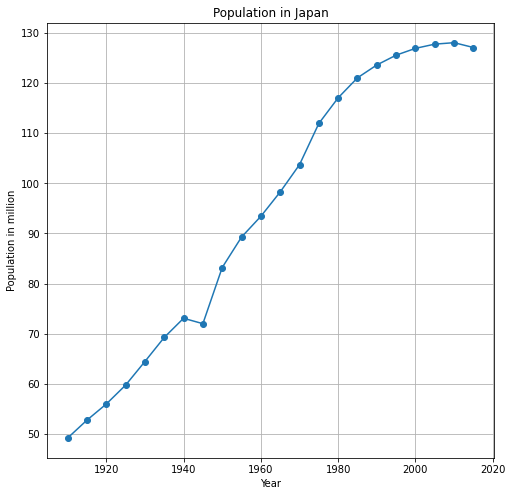

In [10]:
pop_start = 49.184 # 1910 年の人口49.184 百万人
year_step = 5 # 人口データの年間隔5 年

# 内包表記を使用して人口pop を計算
pop = [pop_start +
    year_step * np.sum(diff_rate_jp_pop[:i+1])
    for i in range(len(diff_rate_jp_pop))]

# 1910年のデータを追加
pop = np.append(pop_start, pop)
year = np.append(1910, year)

# グラフの作成
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(year, pop, marker='o')

# グラフにタイトルをつける
ax.set_title('Population in Japan')
# 軸のラベルの設定
ax.set_xlabel('Year')
ax.set_ylabel('Population in million')

# グリッドの表示
ax.grid()

# グラフの表示
plt.show()

## 不定積分

In [11]:
# f(x) = x をx について積分する
integrate(x, x)

 2
x 
──
2 

### さまざまな関数の積分

In [12]:
# f(x) = x**2 をx について積分する
integrate(x**2, x)

 3
x 
──
3 

In [13]:
# n次関数
n = symbols('n')
integrate(x**n, x)

⎧ n + 1            
⎪x                 
⎪──────  for n ≠ -1
⎨n + 1             
⎪                  
⎪log(x)  otherwise 
⎩                  

In [14]:
# 三角関数 sin(x)
from sympy import sin
integrate(sin(x), x)

-cos(x)

In [15]:
# 三角関数 cos(x)
from sympy import cos
integrate(cos(x), x)

sin(x)

In [16]:
# 三角関数 tan(x)
from sympy import tan
integrate(tan(x), x)

-log(cos(x))

In [17]:
# 対数関数
from sympy import log
integrate(log(x), x)

x⋅log(x) - x

In [18]:
# 指数関数
from sympy import exp
integrate(exp(x), x)

 x
ℯ 

## 面積の計算

### 積分領域の可視化

In [19]:
# SymPy の関数を数値計算可能な関数に変換するlambdify をインポート
from sympy import lambdify
# 積分領域の可視化
def plot_integral(f, a, b):
    # 積分領域を表示するための数値データの作成
    f_val = lambdify(x, f)
    x_val = np.linspace(a, b, 100)
    y_val = np.array([f_val(val) for val in x_val])
    # 積分領域の塗りつぶす
    plt.fill_between(x_val, y_val, 0, alpha=0.3)
    # 積分下限の罫線をプロット
    plt.vlines(a, 0, f_val(a), 'b', linestyle=':')
    # 積分上限の罫線をプロット
    plt.vlines(b, 0, f_val(b), 'b', linestyle=':')
    plt.xticks(np.linspace(a,b,5))
    plt.plot(x_val, y_val, color='black')

    plt.xlabel('x')
    plt.ylabel('y')

    plt.show()

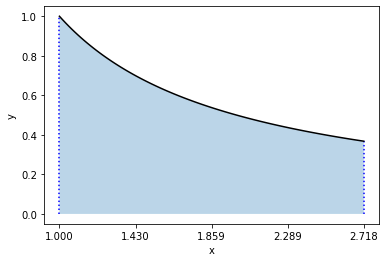

In [20]:
plot_integral(1/x, 1, np.e)

In [21]:
integrate(1/x, (x, 1, np.e))

1.00000000000000

### 円の面積

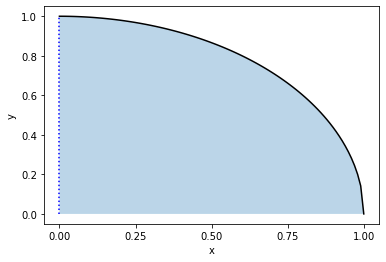

In [22]:
from sympy import sqrt
plot_integral(sqrt(1 - x**2), 0, 1)

In [23]:
4 * integrate(sqrt(1 - x**2), (x, 0, 1))

π

In [24]:
# 半径の符号は正のためpositive=True を設定
r = symbols('r', positive=True)
# 円の面積の計算
4 * integrate(sqrt(r**2 - x**2), (x, 0, r))

   2
π⋅r 

### ガウス関数の面積

In [25]:
from sympy import pi
# s とm のsymbol を作成
s = symbols('s', real=True, positive=True)
m = symbols('m', real=True)
# ガウス関数の入力
gaussian = 1/sqrt(2*pi)/s * exp(-(x-m)**2/2/s**2)
gaussian

             2 
    -(-m + x)  
    ───────────
           2   
        2⋅s    
√2⋅ℯ           
───────────────
     2⋅√π⋅s    

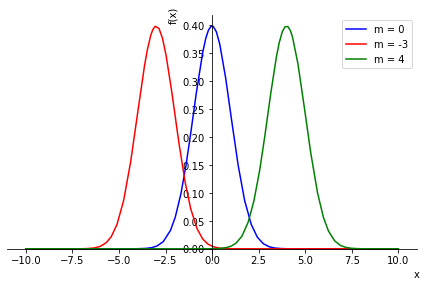

In [26]:
from sympy.plotting import plot

p = plot(gaussian.subs([(s, 1), (m, 0)]),
         gaussian.subs([(s, 1), (m, -3)]),
         gaussian.subs([(s, 1), (m, 4)]),
         legend=True, show=False)

# プロットの色の設定
p[0].line_color = 'b'
p[1].line_color = 'r'
p[2].line_color = 'g'

# 凡例の設定
p[0].label = 'm = 0'
p[1].label = 'm = -3'
p[2].label = 'm = 4'

# グラフの表示
p.show()

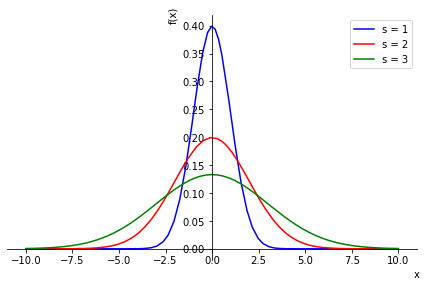

In [27]:
# s の値を変化させたときのガウス関数のプロット
p = plot(gaussian.subs([(s, 1), (m, 0)]),
         gaussian.subs([(s, 2), (m, 0)]),
         gaussian.subs([(s, 3), (m, 0)]),
         legend=True, show=False)

# プロットの色の設定
p[0].line_color = 'b'
p[1].line_color = 'r'
p[2].line_color = 'g'
# 凡例の設定
p[0].label = 's = 1'
p[1].label = 's = 2'
p[2].label = 's = 3'

# グラフの表示
p.show()

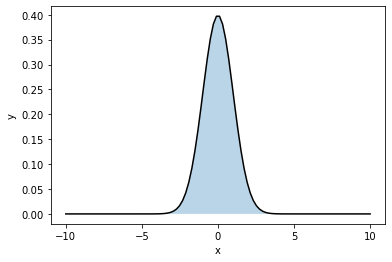

In [28]:
plot_integral(gaussian.subs([(s, 1), (m, 0)]), -10, 10)

In [29]:
from sympy import oo
integrate(gaussian, (x, -oo, oo))

1

## モンテカルロ法

### 乱数の生成

In [30]:
from numpy.random import default_rng

# 乱数生成器をインスタンス
rng = default_rng(2)
rng.uniform(0, 1)

0.2616121342493164

In [31]:
# N = 5 の配列
rng = default_rng(2)
rng.uniform(0, 1, 5)

array([0.26161213, 0.29849114, 0.81422574, 0.09191594, 0.60010053])

### 乱数のプロット

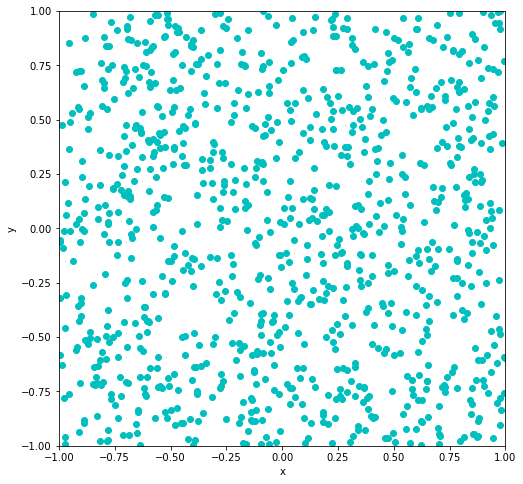

In [32]:
# -1 から1 の範囲で乱数(x, y) を生成
N = 1000
rng = default_rng(2)
x = rng.uniform(-1, 1, N)
y = rng.uniform(-1, 1, N)

# プロットエリアの作成
fig = plt.figure(figsize=(8, 8))

# scatter を使用した散布図の作成
plt.scatter(x, y, color='c')

# プロット範囲の設定
plt.ylim(-1, 1)
plt.xlim(-1, 1)

# 軸ラベルの設定
plt.xlabel('x')
plt.ylabel('y')

# プロットの表示
plt.show()

In [33]:
# 原点からの距離
r = np.sqrt(x**2 + y**2)

# 円の内側の点の座標の抽出
x_in = x[r <= 1]
y_in = y[r <= 1]

# 円の外側の点の座標の抽出
x_out = x[r > 1]
y_out = y[r > 1]

In [34]:
# 点数の確認
print(f'Data length, x_in:{len(x_in)}, x_out:{len(x_out)}')

Data length, x_in:771, x_out:229


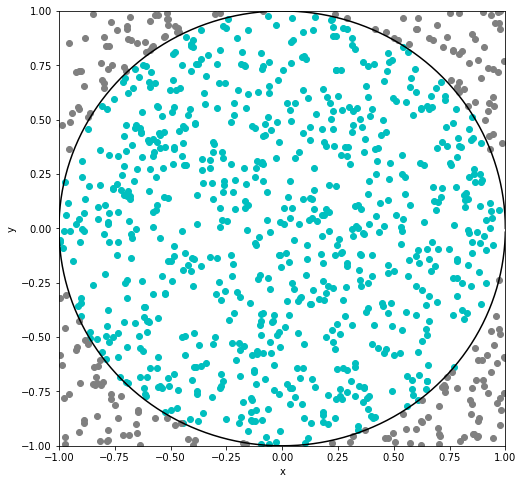

In [35]:
# 円の描画ためのデータ
theta = np.arange(0, 360, 1)
x_circle = np.cos(np.radians(theta))
y_circle = np.sin(np.radians(theta))

# プロットの作成
fig = plt.figure(figsize=(8, 8))
# 円の内側
plt.scatter(x_in, y_in, color='c')
# 円の外側
plt.scatter(x_out, y_out, color='gray')
# 円の描画
plt.plot(x_circle, y_circle, color='k')

# プロット範囲の設定
plt.ylim(-1, 1)
plt.xlim(-1, 1)

# 軸ラベルの設定
plt.xlabel('x')
plt.ylabel('y')

# プロットの表示
plt.show()

In [36]:
# 円の内側の領域の点数: np.sum(r <= 1)
# 正方形内部の点数: N
# 正方形の面積: 4
np.sum(r <= 1) / N * 4

3.084

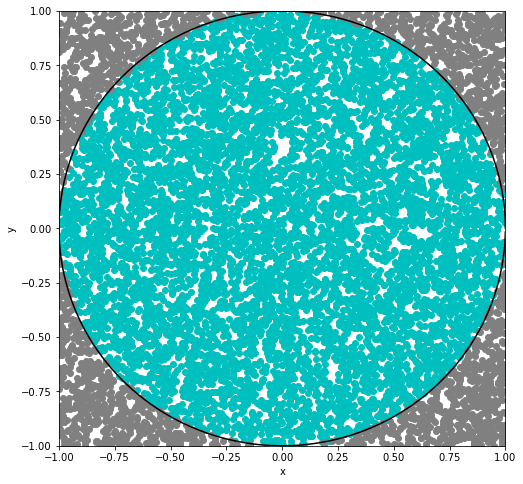

In [37]:
# 0 から1 の範囲で(x, y) を生成
N = 10000
rng = default_rng(2)
x = rng.uniform(-1, 1, N)
y = rng.uniform(-1, 1, N)

# 原点からの距離を計算
r = np.sqrt(x**2 + y**2)

# 円の内側
x_in = x[r <= 1]
y_in = y[r <= 1]

# 円の外側
x_out = x[r > 1]
y_out = y[r > 1]

# プロットの作成
fig = plt.figure(figsize=(8, 8))
# 円の内側
plt.scatter(x_in, y_in, color='c')
# 円の外側
plt.scatter(x_out, y_out, color='gray')
# 円の描画
plt.plot(x_circle, y_circle, color='k')

# プロット範囲の設定
plt.ylim(-1, 1)
plt.xlim(-1, 1)

# 軸ラベルの設定
plt.xlabel('x')
plt.ylabel('y')

# プロットの表示
plt.show()

In [38]:
np.sum(r <= 1) / N * 4

3.126